# Контест 1
## Студент: Постнов Л. А.
## Группа: М8О-306Б-22

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Подгружаем датасет

In [112]:
df = pd.read_csv('./train.csv')
df

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Следующая функция строит графиики распределения определенного признака из определенного датасета

In [113]:
def distribution_plot(df, feature):
    sns.histplot(df[feature], kde=True)
    plt.title(f'Распределение признака {feature}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')

    plt.show()

Начинаем обработку данных, а именно работу с пропущенными значениями:
* Удаляем полностью пустые строки
* Заполняем пропуски в категориальных признаках модой
* Используем KNN для заполнения пропусков в числовых признаках

Между делом проверяем, что все пропуски действительно ушли

In [114]:
df = df.dropna(how='all').copy()
df.isnull().sum()

ApplicationDate                 0
Age                             0
AnnualIncome                    0
CreditScore                   501
LoanAmount                    501
LoanDuration                    0
MaritalStatus                   0
NumberOfDependents              0
HomeOwnershipStatus             0
MonthlyDebtPayments           501
CreditCardUtilizationRate       0
NumberOfOpenCreditLines         0
NumberOfCreditInquiries         0
DebtToIncomeRatio               0
BankruptcyHistory             501
LoanPurpose                   501
PreviousLoanDefaults            0
PaymentHistory                  0
LengthOfCreditHistory           0
SavingsAccountBalance           0
CheckingAccountBalance        501
TotalAssets                   501
TotalLiabilities                0
MonthlyIncome                   0
UtilityBillsPaymentHistory      0
JobTenure                       0
EmploymentStatus                0
EducationLevel                  0
Experience                      0
NetWorth      

In [115]:
df.select_dtypes(include=['object']).isnull().sum()

ApplicationDate          0
MaritalStatus            0
HomeOwnershipStatus      0
LoanPurpose            501
EmploymentStatus         0
EducationLevel           0
dtype: int64

In [116]:
df['LoanPurpose'] = df['LoanPurpose'].fillna(df['LoanPurpose'].mode()[0])
df.select_dtypes(include=['object'])

,ApplicationDate,MaritalStatus,HomeOwnershipStatus,LoanPurpose,EmploymentStatus,EducationLevel
0,2010-06-26,Divorced,Rent,Education,Employed,Associate
1,1996-09-23,Widowed,Mortgage,Home,Employed,High School
2,2015-01-19,Married,Mortgage,Education,Employed,Bachelor
3,1981-05-12,Married,Other,Debt Consolidation,Employed,High School
4,1995-05-07,Single,Rent,Debt Consolidation,Employed,Bachelor
...,...,...,...,...,...,...
11011,1980-01-15,Divorced,Own,Home,Employed,Associate
11012,2010-07-10,Married,Own,Education,Employed,Associate
11013,2003-10-22,Single,Own,Home,Employed,Bachelor
11014,1983-05-12,Married,Rent,Education,Self-Employed,Associate


In [117]:
df.select_dtypes(include=['object']).isnull().sum()

ApplicationDate        0
MaritalStatus          0
HomeOwnershipStatus    0
LoanPurpose            0
EmploymentStatus       0
EducationLevel         0
dtype: int64

In [118]:
from sklearn.impute import KNNImputer

columns_with_missing_data = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer(n_neighbors=5)
df[columns_with_missing_data] = imputer.fit_transform(df[columns_with_missing_data])

In [119]:
df.isnull().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

Удаляем дублирующиеся данные

In [120]:
df = df.drop_duplicates()

Удаляем столбец с датой за ненадобностью

In [121]:
df.drop('ApplicationDate', axis=1, inplace=True)

Исследуем целевую переменную и удаляем выбросы

In [122]:
round(df['RiskScore'].describe(), 2)

count       10000.00
mean       -29952.69
std       1455786.57
min      -9999999.00
25%            32.53
50%            44.10
75%            65.30
max      10000000.00
Name: RiskScore, dtype: float64

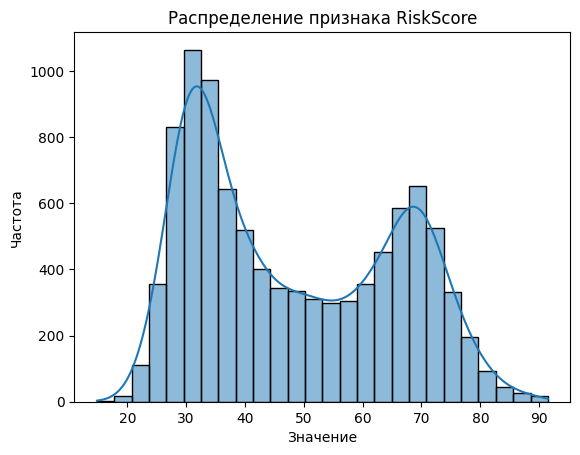

In [123]:
lower_bound = df['RiskScore'].quantile(0.01)
upper_bound = df['RiskScore'].quantile(0.99)

filtered_data = df[(df['RiskScore'] > lower_bound) & (df['RiskScore'] < upper_bound)]

distribution_plot(filtered_data, 'RiskScore')

df = filtered_data

Исследуем два не очень понятных мне признака

[0.        1.        0.0525736]


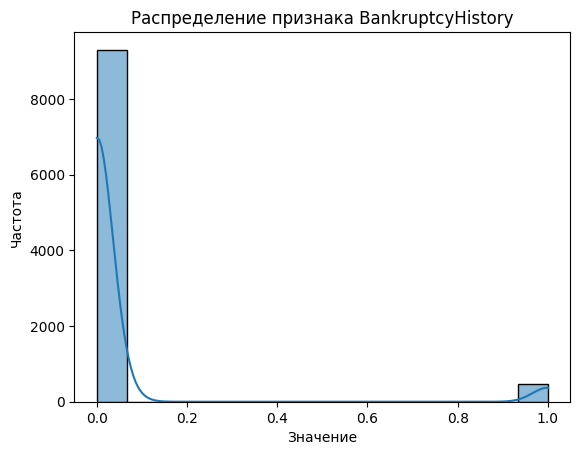

In [124]:
print(df['BankruptcyHistory'].unique())
distribution_plot(df, 'BankruptcyHistory')

Замечаем, что, вообще говоря, признак должен быть логическим (1 и 0), но помимо этого присутствует какое-то залетное значение, его мы депортируем из датасета

In [125]:
print(df[(df['BankruptcyHistory'] != 1) & (df['BankruptcyHistory'] != 0)].count())
df = df[(df['BankruptcyHistory'] == 1) | (df['BankruptcyHistory'] == 0)]

Age                           456
AnnualIncome                  456
CreditScore                   456
LoanAmount                    456
LoanDuration                  456
MaritalStatus                 456
NumberOfDependents            456
HomeOwnershipStatus           456
MonthlyDebtPayments           456
CreditCardUtilizationRate     456
NumberOfOpenCreditLines       456
NumberOfCreditInquiries       456
DebtToIncomeRatio             456
BankruptcyHistory             456
LoanPurpose                   456
PreviousLoanDefaults          456
PaymentHistory                456
LengthOfCreditHistory         456
SavingsAccountBalance         456
CheckingAccountBalance        456
TotalAssets                   456
TotalLiabilities              456
MonthlyIncome                 456
UtilityBillsPaymentHistory    456
JobTenure                     456
EmploymentStatus              456
EducationLevel                456
Experience                    456
NetWorth                      456
BaseInterestRa

[0. 1.]


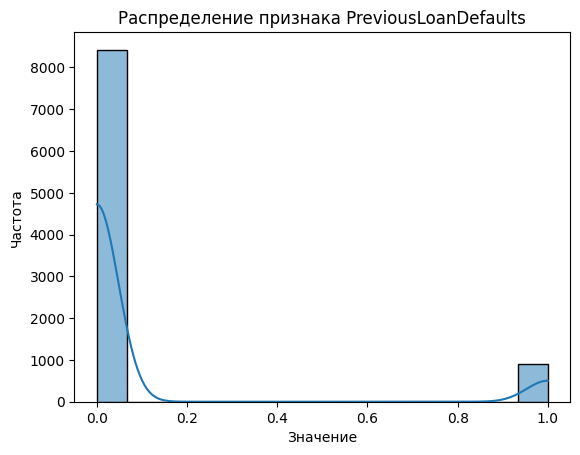

In [126]:
print(df['PreviousLoanDefaults'].unique())
distribution_plot(df, 'PreviousLoanDefaults')

Отделяем целевую переменную в отдельный датафрейм, для дальнейшего использованя в обучении моделей

In [127]:
Y = df.iloc[:,-1]
df.drop('RiskScore', axis=1, inplace=True)
Y

/tmp/ipykernel_1505/1961070448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('RiskScore', axis=1, inplace=True)


0       66.176500
1       28.495737
2       34.488104
3       36.910753
4       31.347091
          ...    
9994    34.037970
9995    76.185933
9996    41.213393
9997    43.699684
9999    56.104270
Name: RiskScore, Length: 9323, dtype: float64

Используем Z-преобразование, чтобы нормализовать признаки, не забывая исключить логические признаки (1 и 0)

In [128]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.select_dtypes(include=['float64']).columns.tolist()
columns_to_normalize.remove('LoanApproved')
columns_to_normalize.remove('BankruptcyHistory')
columns_to_normalize.remove('PreviousLoanDefaults')
scaler = StandardScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df

/tmp/ipykernel_1505/1126394449.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,CreditCardUtilizationRate,...,JobTenure,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,-1.112099,-0.559597,-0.737756,-0.457976,0.271294,Divorced,-0.399958,Rent,1.087923,-0.834137,...,-0.430277,Employed,Associate,-1.206527,-0.258040,0.612459,0.537462,-0.430258,-0.263294,0.0
1,1.305754,0.348166,0.980405,-0.501162,-0.711522,Widowed,-0.399958,Mortgage,-0.667541,-0.685421,...,-1.336108,Employed,High School,1.356729,-0.275716,-1.212064,-1.109263,-0.425902,-0.543636,1.0
2,0.960346,1.450164,0.980405,0.315925,-0.711522,Married,-1.105237,Mortgage,-0.002292,1.001467,...,-0.883192,Employed,Bachelor,0.914788,0.275178,-0.974795,-0.877580,0.149421,-0.517677,1.0
3,-1.284803,-0.836671,0.963280,-0.388586,-0.220114,Married,-1.105237,Other,-0.782718,-0.605384,...,-0.883192,Employed,High School,-1.560079,-0.314674,-1.057158,-0.904855,-0.438247,-0.337207,1.0
4,1.305754,1.450164,0.980405,0.023178,-0.220114,Single,0.305321,Rent,0.029481,-0.072307,...,0.022638,Employed,Bachelor,1.179953,-0.325022,-0.953530,-1.152286,-0.241640,-0.541114,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.766691,1.450164,0.980405,-0.559975,0.271294,Married,0.305321,Mortgage,-0.719172,-1.433548,...,-0.430277,Employed,Doctorate,-0.676198,-0.319566,-1.016593,-0.896528,-0.576083,-0.579610,1.0
9995,-1.112099,-1.006324,-1.810894,-0.376912,-0.711522,Single,-0.399958,Other,0.148631,0.780692,...,0.022638,Employed,High School,-1.383303,-0.266195,1.422431,1.523035,-0.148420,0.813665,0.0
9996,0.787643,0.459656,-0.600760,-0.818210,1.254110,Married,-1.105237,Mortgage,0.792036,-1.188933,...,-0.430277,Employed,High School,0.826400,-0.304173,0.592872,0.366745,-0.680305,-0.517054,1.0
9997,1.305754,1.421962,0.980405,0.525485,1.254110,Divorced,0.305321,Mortgage,-0.135342,0.557330,...,-0.430277,Employed,High School,1.356729,-0.326946,-0.488844,-0.570386,-0.177711,-0.540392,1.0


Используем One-Hot-Ecoding

In [129]:
categorial = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns=categorial, drop_first=True)

bool_cols = df.select_dtypes(include=['bool']).columns.tolist()
df[bool_cols] = df[bool_cols].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9323 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             9323 non-null   float64
 1   AnnualIncome                    9323 non-null   float64
 2   CreditScore                     9323 non-null   float64
 3   LoanAmount                      9323 non-null   float64
 4   LoanDuration                    9323 non-null   float64
 5   NumberOfDependents              9323 non-null   float64
 6   MonthlyDebtPayments             9323 non-null   float64
 7   CreditCardUtilizationRate       9323 non-null   float64
 8   NumberOfOpenCreditLines         9323 non-null   float64
 9   NumberOfCreditInquiries         9323 non-null   float64
 10  DebtToIncomeRatio               9323 non-null   float64
 11  BankruptcyHistory               9323 non-null   float64
 12  PreviousLoanDefaults            9323 no

Первая модель!!!!!

Используем ElasicNet, который смещен в сторону LASSO, чтобы отобрать самые важные признаки

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

elastic_net_cv = ElasticNetCV(cv=5,
                              l1_ratio=[0.7, 0.9, 1.0],
                              alphas=[0.1, 1, 10],
                              random_state=52,
                              fit_intercept=True)

elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

print("Коэффициенты признаков:", elastic_net_cv.coef_)

Mean Squared Error: 20.57562891403706
Коэффициенты признаков: [ -0.          -0.08148393  -6.64778022  -0.34300229   0.
   0.          -0.0285642    0.77579839   0.          -0.
   2.01597389   9.58718925   1.08896621   0.          -0.67808126
  -0.           0.          -1.16282549   0.10734516  -1.6128206
   0.           0.          -0.          -0.           0.
   0.          -0.25330833   0.69971906 -18.4466259    0.
  -0.          -0.          -0.           0.           0.
  -0.           0.          -0.          -0.           1.24075991
   0.2556815    0.           0.          -0.           0.        ]


In [131]:
coefs = elastic_net_cv.coef_
feature_names = df.columns
important_features = feature_names[coefs != 0]
important_features

Index(['AnnualIncome', 'CreditScore', 'LoanAmount', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'LengthOfCreditHistory', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'MonthlyLoanPayment',
       'TotalDebtToIncomeRatio', 'LoanApproved',
       'EmploymentStatus_Self-Employed', 'EmploymentStatus_Unemployed'],
      dtype='object')

Визуализируем распределения наиболее важных признаков

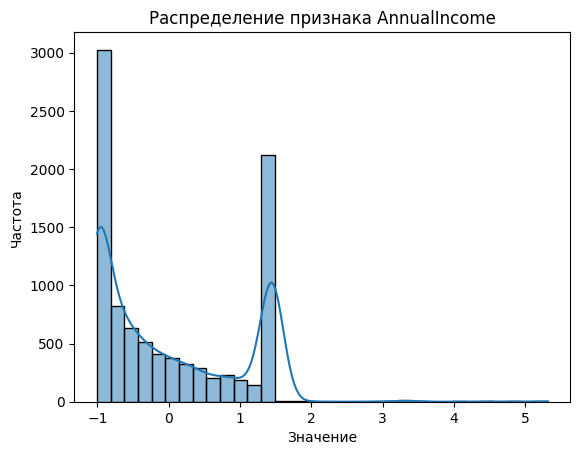

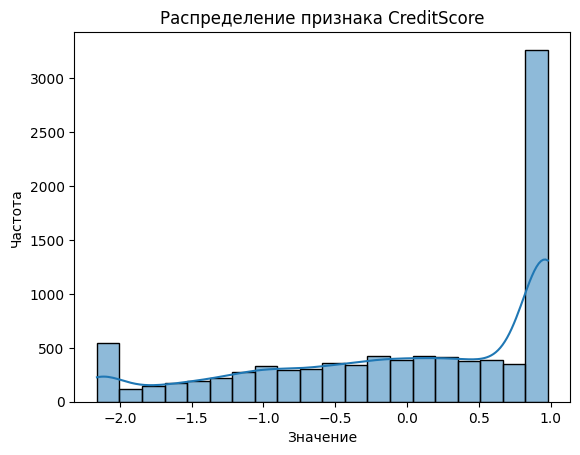

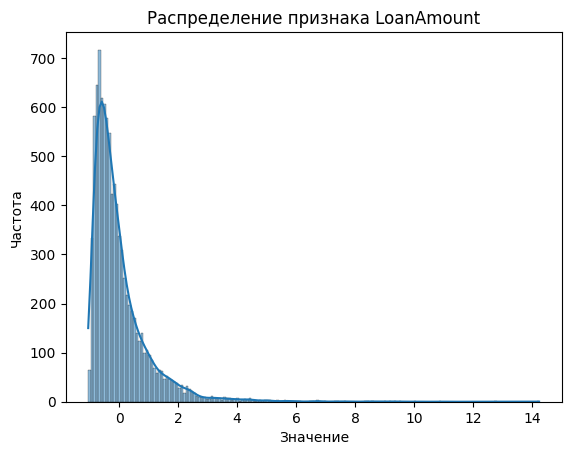

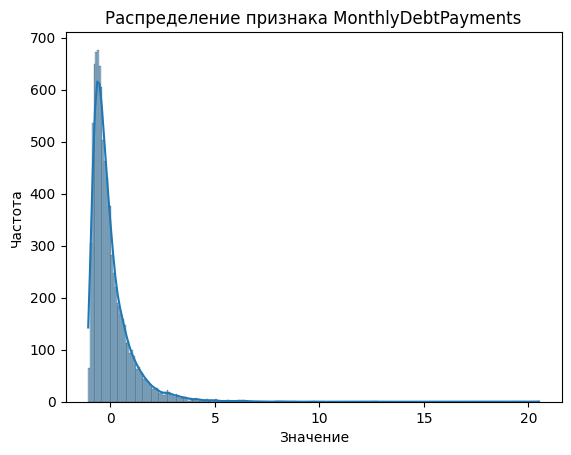

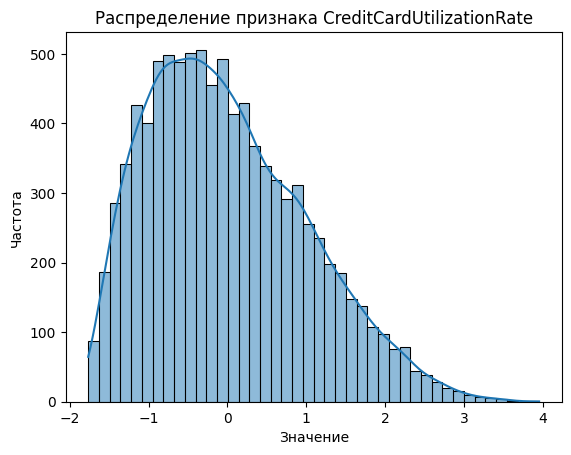

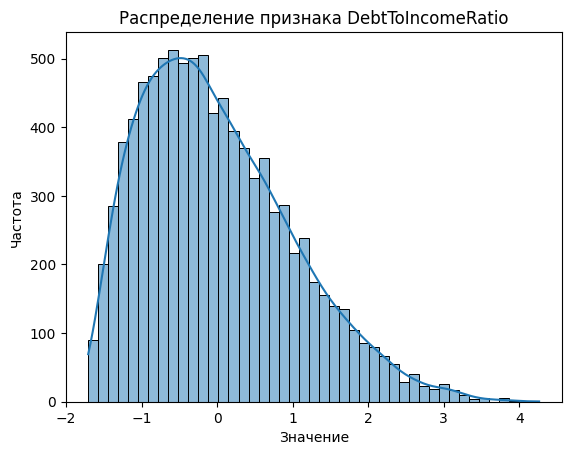

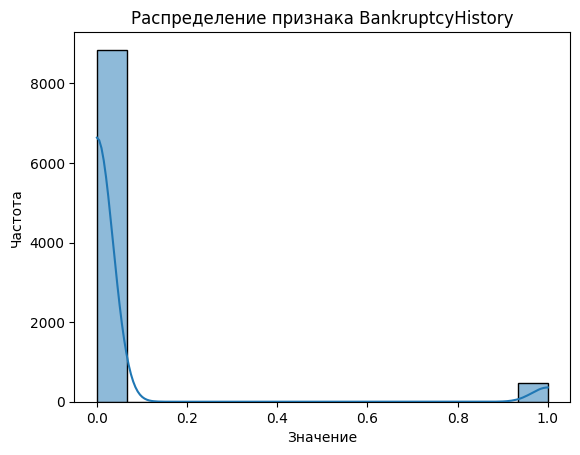

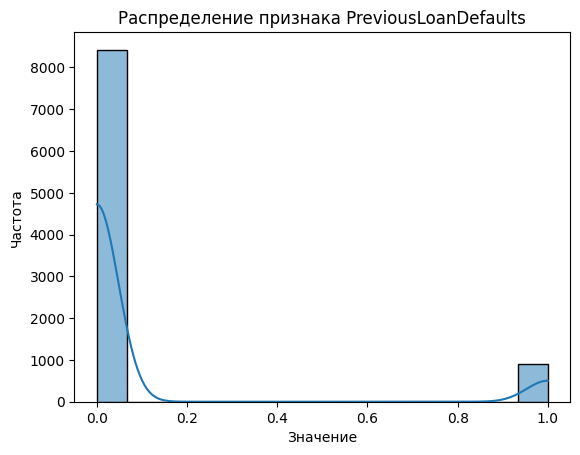

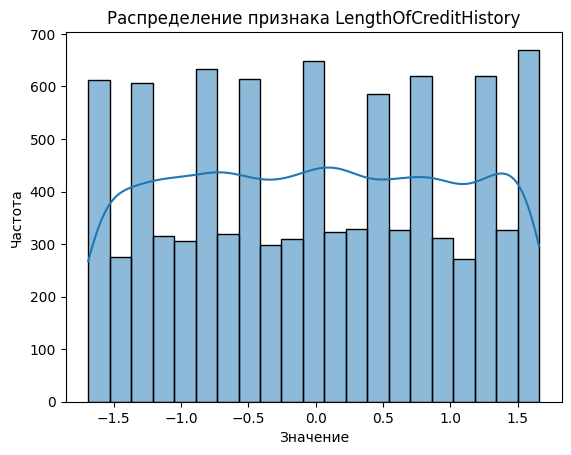

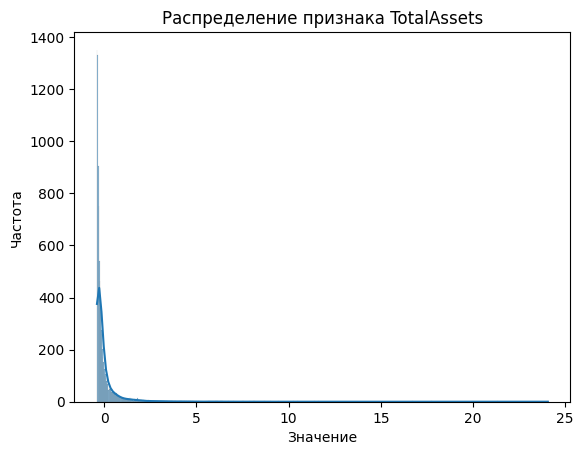

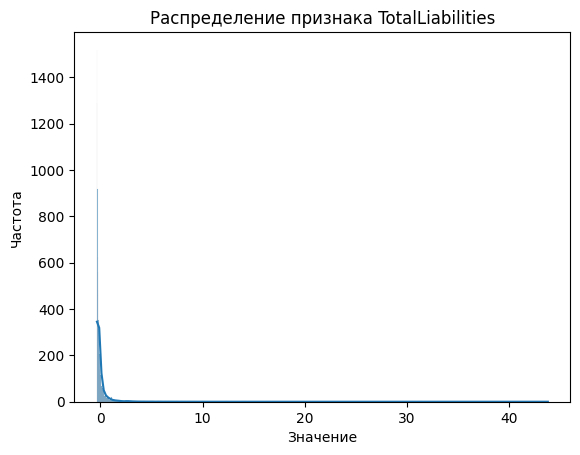

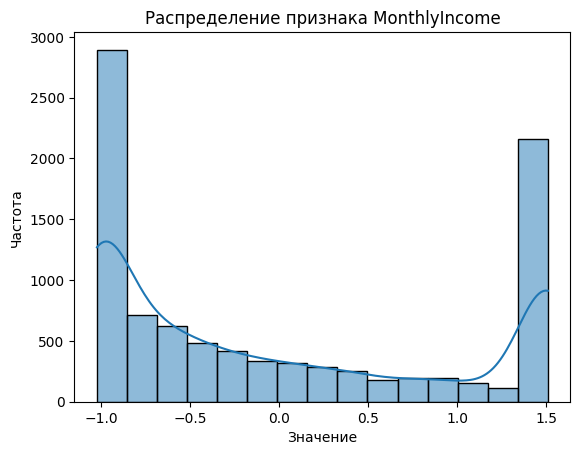

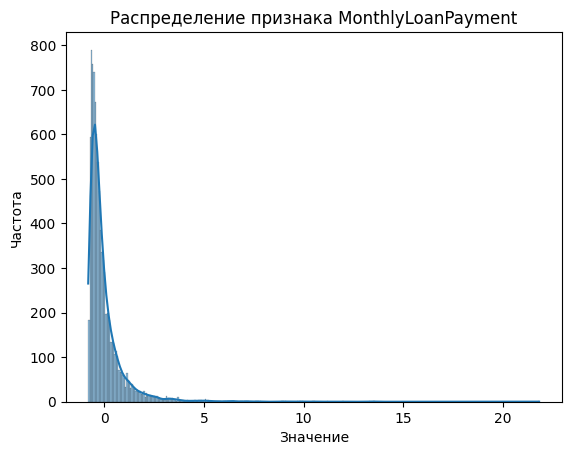

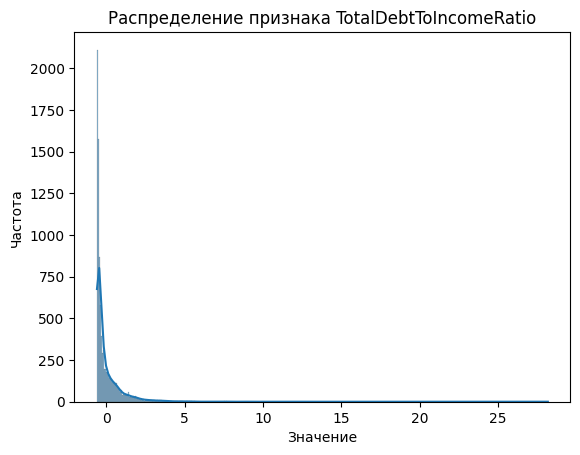

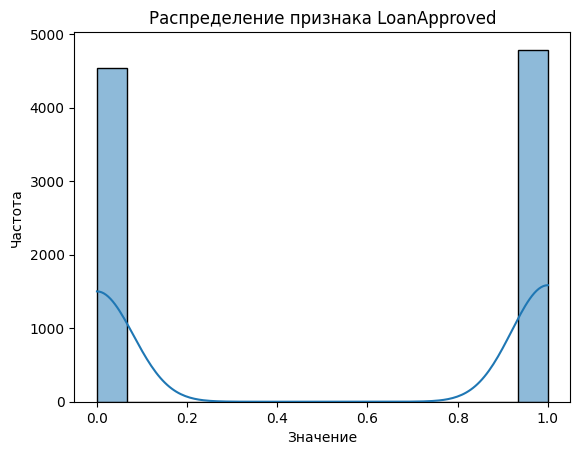

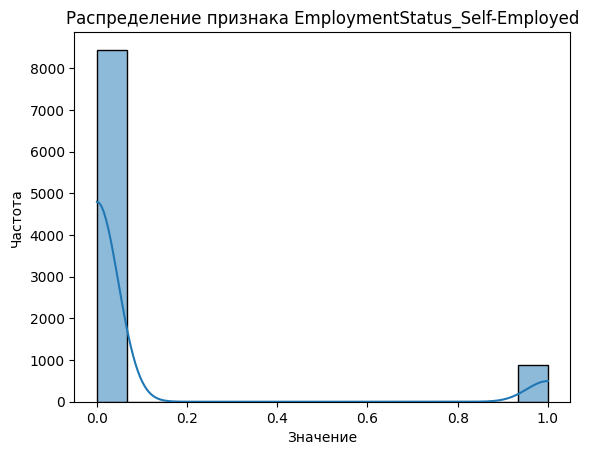

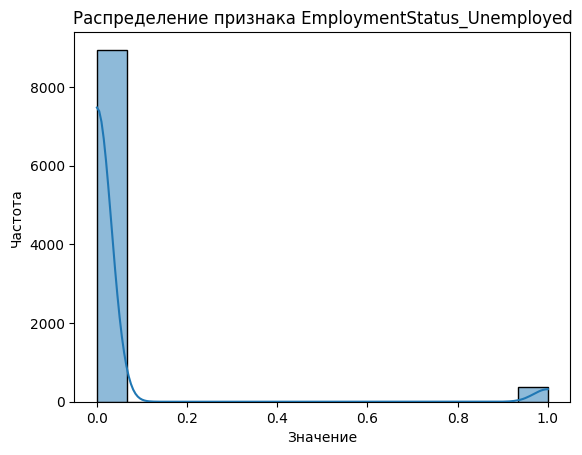

In [132]:
for feature in important_features:
    distribution_plot(df, feature)

Посмотрев на распределения, мы можем понять, что некоторые признаки можно засунуть под логарифм и получить нечто похожее на нормальное расперделение, что, вообще говоря, может быть полезно для улучшения предсказание (реализуем в следующих эпизодах...)

In [133]:
df = df[important_features]
df

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyIncome,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,-0.559597,-0.737756,-0.457976,1.087923,-0.834137,-0.563495,0.0,0.0,-1.228167,-0.285075,-0.264089,-0.562393,-0.430258,-0.263294,0.0,0.0,0.0
1,0.348166,0.980405,-0.501162,-0.667541,-0.685421,-0.750288,0.0,0.0,-0.534965,-0.194518,-0.019497,0.372770,-0.425902,-0.543636,1.0,0.0,0.0
2,1.450164,0.980405,0.315925,-0.002292,1.001467,-1.515502,1.0,0.0,-0.419431,0.239622,-0.269420,1.508030,0.149421,-0.517677,1.0,0.0,0.0
3,-0.836671,0.963280,-0.388586,-0.782718,-0.605384,0.898895,0.0,0.0,0.620373,-0.365227,-0.318817,-0.847830,-0.438247,-0.337207,1.0,0.0,0.0
4,1.450164,0.980405,0.023178,0.029481,-0.072307,-1.254777,0.0,0.0,-0.766032,-0.321282,1.386718,1.508030,-0.241640,-0.541114,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.450164,0.980405,-0.559975,-0.719172,-1.433548,-0.957421,0.0,0.0,-1.459235,-0.352542,0.048394,1.508030,-0.576083,-0.579610,1.0,0.0,0.0
9995,-1.006324,-1.810894,-0.376912,0.148631,0.780692,0.614184,0.0,1.0,0.042704,-0.291712,-0.260866,-1.022604,-0.148420,0.813665,0.0,0.0,0.0
9996,0.459656,-0.600760,-0.818210,0.792036,-1.188933,-1.381510,0.0,0.0,1.198041,-0.272365,-0.132067,0.487625,-0.680305,-0.517054,1.0,0.0,0.0
9997,1.421962,0.980405,0.525485,-0.135342,0.557330,0.782722,1.0,0.0,0.389305,-0.350661,0.679569,1.478977,-0.177711,-0.540392,1.0,0.0,0.0


Великая и ужасная матрица корреляций

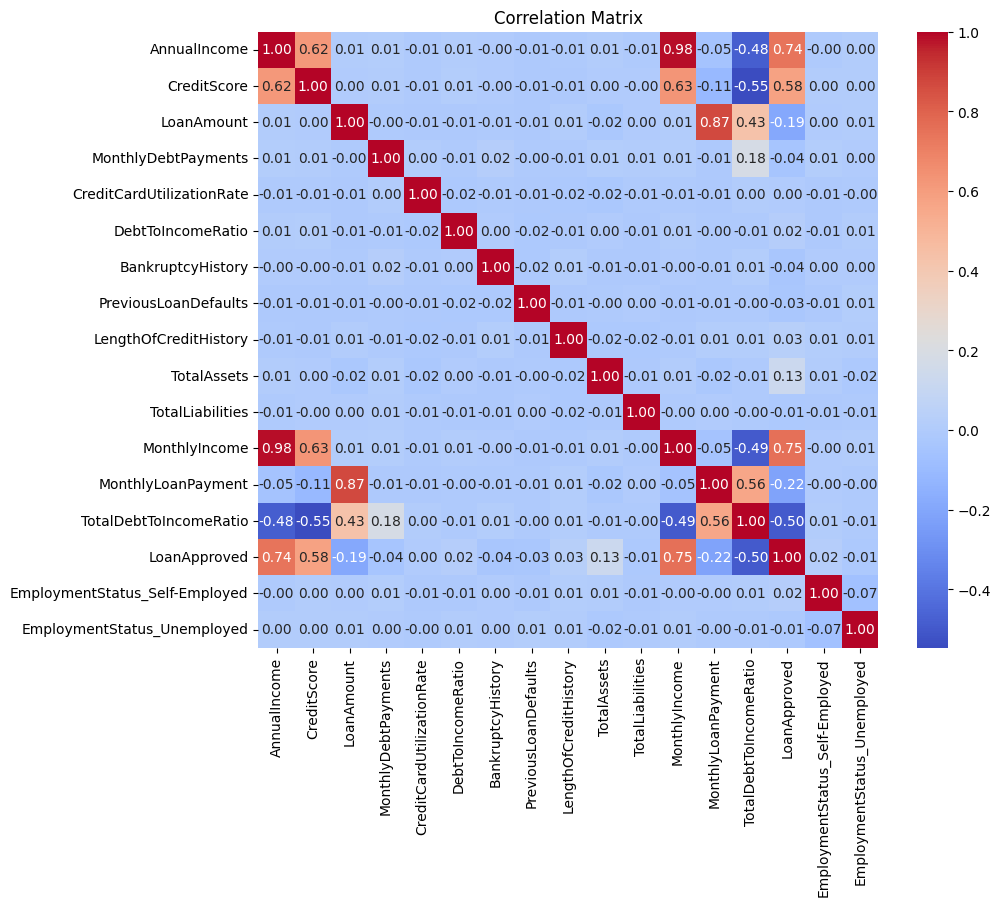

In [134]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Кто бы мог подумать, что месячный доход так сильно коррелирует с годовым доходом... Депортируем его из датасета

In [135]:
df.drop(['MonthlyIncome'], axis=1, inplace=True)
df

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,-0.559597,-0.737756,-0.457976,1.087923,-0.834137,-0.563495,0.0,0.0,-1.228167,-0.285075,-0.264089,-0.430258,-0.263294,0.0,0.0,0.0
1,0.348166,0.980405,-0.501162,-0.667541,-0.685421,-0.750288,0.0,0.0,-0.534965,-0.194518,-0.019497,-0.425902,-0.543636,1.0,0.0,0.0
2,1.450164,0.980405,0.315925,-0.002292,1.001467,-1.515502,1.0,0.0,-0.419431,0.239622,-0.269420,0.149421,-0.517677,1.0,0.0,0.0
3,-0.836671,0.963280,-0.388586,-0.782718,-0.605384,0.898895,0.0,0.0,0.620373,-0.365227,-0.318817,-0.438247,-0.337207,1.0,0.0,0.0
4,1.450164,0.980405,0.023178,0.029481,-0.072307,-1.254777,0.0,0.0,-0.766032,-0.321282,1.386718,-0.241640,-0.541114,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,1.450164,0.980405,-0.559975,-0.719172,-1.433548,-0.957421,0.0,0.0,-1.459235,-0.352542,0.048394,-0.576083,-0.579610,1.0,0.0,0.0
9995,-1.006324,-1.810894,-0.376912,0.148631,0.780692,0.614184,0.0,1.0,0.042704,-0.291712,-0.260866,-0.148420,0.813665,0.0,0.0,0.0
9996,0.459656,-0.600760,-0.818210,0.792036,-1.188933,-1.381510,0.0,0.0,1.198041,-0.272365,-0.132067,-0.680305,-0.517054,1.0,0.0,0.0
9997,1.421962,0.980405,0.525485,-0.135342,0.557330,0.782722,1.0,0.0,0.389305,-0.350661,0.679569,-0.177711,-0.540392,1.0,0.0,0.0


Финальная (на данный момент) модель, используем RidgeCV, в который как понятно по названию, зашита кросс-валидация

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2)

ridge_cv = RidgeCV(cv = 5,
                   alphas=[0.1, 1, 10, 100],
                   fit_intercept=True)

ridge_cv.fit(X_train, y_train)

y_pred = ridge_cv.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 17.66943786818271


Готовим тестовые данные, чтобы модель не была в шоке, увидев столько признаков с ненормализованнымии значениями

In [137]:
from sklearn.preprocessing import StandardScaler

df_test = pd.read_csv('./test.csv')

df_test.drop('ApplicationDate', axis=1, inplace=True)

scaler = StandardScaler()
df_test[columns_to_normalize] = scaler.fit_transform(df_test[columns_to_normalize])

categorial = df_test.select_dtypes(include=['object']).columns.tolist()
df_test = pd.get_dummies(df_test, columns=categorial, drop_first=True)
bool_cols = df_test.select_dtypes(include=['bool']).columns.tolist()
df_test[bool_cols] = df_test[bool_cols].astype(float)

df_test = df_test[important_features]
df_test.drop(['MonthlyIncome'], axis=1, inplace=True)

In [138]:
df_test

,AnnualIncome,CreditScore,LoanAmount,MonthlyDebtPayments,CreditCardUtilizationRate,DebtToIncomeRatio,BankruptcyHistory,PreviousLoanDefaults,LengthOfCreditHistory,TotalAssets,TotalLiabilities,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,0.638663,0.971893,-0.546054,-0.336550,-1.300770,1.279373,0,0,-0.061508,-0.421227,-0.275714,-0.535452,-0.510505,1,0.0,0.0
1,-0.596647,-0.025652,1.190827,-0.612864,-1.320560,1.335073,0,0,1.425861,0.352588,-0.326070,0.762163,-0.073543,0,0.0,0.0
2,1.444370,0.507128,-0.465971,-0.150339,0.298636,-1.509054,0,0,-0.747987,-0.402636,-0.409819,-0.481443,-0.516557,1,0.0,0.0
3,1.444370,0.971893,0.620613,0.045884,1.639138,0.177055,0,0,-0.747987,-0.372335,0.194684,0.322696,-0.463079,1,1.0,0.0
4,1.444370,-0.036987,0.728809,-0.877165,0.956348,-0.394275,0,0,-1.091226,0.654890,-0.432463,0.263987,-0.486155,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1.444370,0.971893,-0.606023,-0.220418,-1.392589,1.065326,0,0,-0.404748,-0.382946,-0.382562,-0.576237,-0.523852,1,1.0,0.0
4996,-0.506793,-0.603774,0.642497,-0.895185,-1.426408,0.099391,0,0,0.510557,-0.379088,-0.348610,0.469251,-0.235520,0,0.0,0.0
4997,-1.027257,-1.272583,0.078546,-0.510748,0.752251,-1.532813,0,0,0.968209,0.595985,-0.373385,-0.104318,0.494810,0,0.0,0.0
4998,-0.303400,0.971893,-0.069980,-0.662921,-0.921494,-1.477422,0,1,-0.290335,-0.182445,5.099897,-0.392635,-0.457427,0,1.0,0.0


Строим предикт и сохраняем его в файлик

In [219]:
prediction = ridge_cv.predict(df_test)
df_prediction = pd.DataFrame(prediction, columns=['RiskScore'])
df_prediction = df_prediction.reset_index()
df_prediction.rename(columns={'index': 'ID'}, inplace=True)
df_prediction.to_csv('submission.csv', index=False)
df_prediction

,ID,RiskScore
0,0,32.632651
1,1,57.208338
2,2,30.431439
3,3,34.018578
4,4,35.204221
...,...,...
4995,4995,33.815527
4996,4996,60.077318
4997,4997,63.329094
4998,4998,53.131759
